In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [39]:
df = pd.read_csv('iris.csv')
df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
df.head(5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


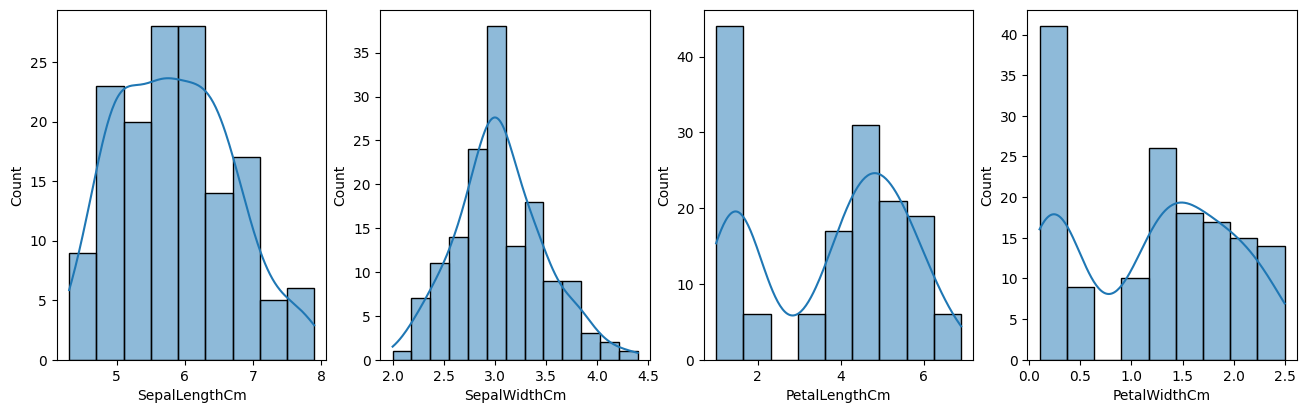

In [40]:
columns = df.iloc[:, :-1].columns
fig = plt.figure(figsize=(16,10))

for i in range(len(columns)):
    column = columns[i]
    sub = fig.add_subplot(2,4,i + 1)
    sns.histplot(data=df, x=column, kde=True)

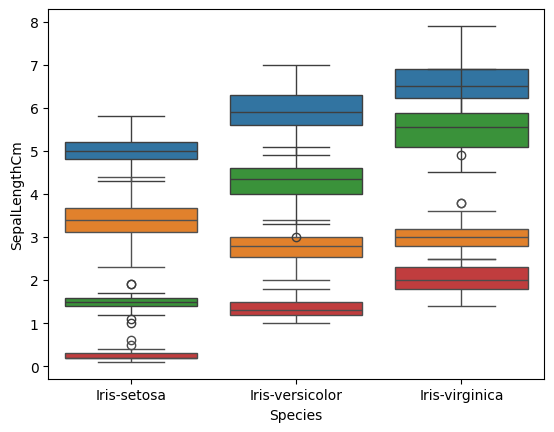

In [41]:
for i in range(len(columns)):
    column = columns[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.boxplot(data=df, x='Species', y=column)    

In [42]:
X = df.iloc[:, :-1].astype(float)
y = df.iloc[:, -1]

X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

X_train.index

Index([123,  40, 111,  97,  86,  38,  76, 146,  82,  30,
       ...
         2, 113, 141,  25,  24,  37,  56,  31,  72,  19],
      dtype='int64', length=120)

In [45]:
X_test.index

Index([116,  36, 128, 117,  88,  74,  91, 115,  77,  21,  94, 133,  47,  90,
        58,  69,   9, 120, 148, 105,  65,  12,  55,  20, 145, 106,  92,  49,
       129, 122],
      dtype='int64')

In [46]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
knn.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

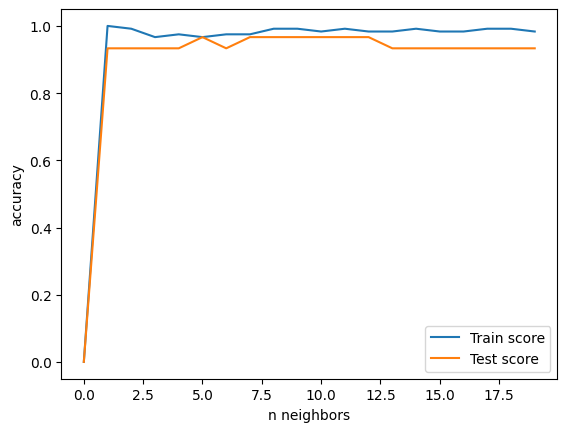

In [48]:
train_accuracy = np.empty(20)
test_accuracy = np.empty(20)

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(np.arange(20), train_accuracy, label='Train score')
plt.plot(np.arange(20),test_accuracy, label='Test score')
plt.legend()
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.show()


In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
sample = [X_test.iloc[0, :]]

y_pred_proba = knn.predict_proba(sample)
y_pred_proba

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 1.]])

In [51]:
knn.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [52]:
distances, indicies = knn.kneighbors(sample)

distances

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.14142136, 0.24494897, 0.36055513, 0.38729833, 0.42426407]])

In [53]:
indicies

array([[36, 11, 41,  2, 16]], dtype=int64)

In [55]:
sample_input = [[4.5, 3.3, 2.2, 1.1]]
# khoảng cách đến các hàng xóm gần nhất của sample input
distances, indicies = knn.kneighbors(sample_input)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [56]:
indicies

array([[ 19,  78, 114,  46,  43]], dtype=int64)

In [57]:
distances

array([[0.9486833 , 0.98488578, 1.        , 1.05356538, 1.09087121]])

In [59]:
y_pred_proba = knn.predict_proba(sample)
y_pred_proba

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 1.]])

In [62]:
y_pred_proba = knn.predict_proba([X_test.iloc[1, :], X_test.iloc[4, :], X_test.iloc[5, :]])

y_pred = (y_pred_proba[:, -1] >= 0.65).astype(float)
y_pred

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0., 0., 0.])

In [64]:
y_pred = knn.predict(X_test)

cfmx = confusion_matrix(y_test, y_pred)
cfmx

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]], dtype=int64)

In [65]:
clrp = classification_report(y_test, y_pred)
print(clrp)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [66]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667
